In [2]:
%load_ext autoreload
%autoreload 2

In [10]:
from vpt.common import *
import vpt.settings as s
import vpt.utils.image_processing as ip
import vpt.hand_detection.depth_context_features as dcf
import vpt.hand_detection.depth_image_features as dif
s.sensor = "realsense"
%matplotlib inline

In [25]:
dmap = load_depthmap("data/posture/p4/p4a/000175.bin")
dmap = background_sub(dmap)
dmap[dmap<600] = 0
dmap_disp = (ip.normalize2(dmap)*255).astype('uint8')

pixel = (135, 235)

In [179]:
offsets_dcf1 = dcf.generate_feature_offsets(M=4, radius=.15)
offsets_dcf2 = dcf.generate_feature_offsets(M=5, radius=.2)
offsets_dcf3 = dcf.generate_feature_offsets(M=5, radius=.15)

In [180]:
_, dcf_pixels1 = dcf.calc_features(dmap, offsets_dcf1)

dcf_pixels1 = dcf_pixels1.reshape(192, 480, len(offsets_dcf1), 2)
pixel_offsets1 = dcf_pixels1[pixel]
idxs = np.all(pixel_offsets1 != -1, axis=1)
offset_x1 = pixel_offsets1[:, 0]
offset_y1 = pixel_offsets1[:, 1]
offset_x1 = offset_x1[idxs]
offset_y1 = offset_y1[idxs]

_, dcf_pixels2 = dcf.calc_features(dmap, offsets_dcf2)

dcf_pixels2 = dcf_pixels2.reshape(192, 480, len(offsets_dcf2), 2)
pixel_offsets2 = dcf_pixels2[pixel]
idxs = np.all(pixel_offsets2 != -1, axis=1)
offset_x2 = pixel_offsets2[:, 0]
offset_y2 = pixel_offsets2[:, 1]
offset_x2 = offset_x2[idxs]
offset_y2 = offset_y2[idxs]

_, dcf_pixels3 = dcf.calc_features(dmap, offsets_dcf3)

dcf_pixels3 = dcf_pixels3.reshape(192, 480, len(offsets_dcf3), 2)
pixel_offsets3 = dcf_pixels3[pixel]
idxs = np.all(pixel_offsets3 != -1, axis=1)
offset_x3 = pixel_offsets3[:, 0]
offset_y3 = pixel_offsets3[:, 1]
offset_x3 = offset_x3[idxs]
offset_y3 = offset_y3[idxs]

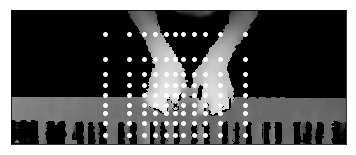

In [189]:
# plt.figure(figsize=(24,12))

# plt.subplot(221)
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# # plt.tight_layout()

# plt.subplot(222)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# plt.scatter(offset_x1, offset_y1, c='white', s=15)
# plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# # plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-4_15.jpg")

# plt.subplot(223)
axes = plt.gca()
axes.set_ylim([192,0])
plt.imshow(dmap_disp, cmap="gray", alpha=1)
plt.scatter(offset_x3, offset_y3, c='white', s=15)
plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-5_15.jpg")

# plt.subplot(224)
# axes = plt.gca()
# axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=1)
# plt.scatter(offset_x2, offset_y2, c='white', s=15)
# plt.scatter(pixel[1], pixel[0], c='black', s=15, marker='x')
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dcf-features-5_20.jpg")
# plt.savefig("feature_offsets.pdf")

In [29]:
offsets_dif = dif.generate_feature_offsets(n_offsets=50, radius=100000)

In [30]:
_, pixels_u, pixels_v = dif.calc_features(dmap, offsets_dif)
pixels_u = pixels_u.reshape(192, 480, len(offsets_dif[1]), 2)
pixels_v = pixels_v.reshape(192, 480, len(offsets_dif[1]), 2)

In [31]:
idxs_u = np.all(pixels_u[pixel] != -1, axis=1)
idxs_v = np.all(pixels_v[pixel] != -1, axis=1)

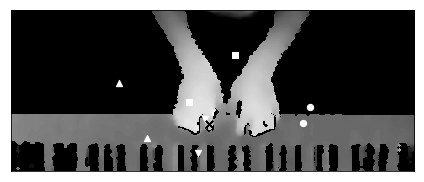

In [174]:
pixel2 = (pixel[0]-30, pixel[1]+50)
n_disp = 4

markers = ['v', 's', 'o', '^']

# plt.figure(figsize=(24, 12))
# plt.subplot(121)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
plt.imshow(dmap_disp, cmap="gray", alpha=1)
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")

for i, m in enumerate(markers):
    plt.scatter(pixels_u[pixel][idxs_u][i, 1], pixels_u[pixel][idxs_u][i, 0], c="white", s=40, marker=m)
    plt.scatter(pixels_v[pixel][idxs_v][i, 1], pixels_v[pixel][idxs_v][i, 0], c="white", s=40, marker=m)
    plt.scatter(pixel[1], pixel[0], c="black", s=50, marker="x")

plt.tight_layout()
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/dif-features.jpg")

# plt.subplot(122)
# axes = plt.gca()
# axes.axes.set_ylim([192,0])
# plt.imshow(dmap_disp, cmap="gray", alpha=.8)
# plt.scatter(pixels_u[pixel2][idxs_u][:n_disp, 1], pixels_u[pixel2][idxs_u][:n_disp, 0], c=cs, s=50, marker="o")
# plt.scatter(pixels_v[pixel2][idxs_v][:n_disp, 1], pixels_v[pixel2][idxs_v][:n_disp, 0], c=cs, s=50, marker='o')
# plt.scatter(pixel2[1], pixel2[0], c='red', s=30, marker="s")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("kinect_offsets.pdf")

In [22]:
data = np.load("data/rdf/testing/p4/000010.npz")
dmap_rdf_disp = data["dmap"]
dmap_rdf_disp = background_sub(dmap_rdf_disp)
dmap_rdf_disp[dmap_rdf_disp==0]=1500
dmap_rdf_disp[dmap_rdf_disp<550]=1500
dmap_rdf_disp[dmap_rdf_disp==1500]=0
dmap_rdf_disp = ip.normalize2(dmap_rdf_disp)

mask_disp = cv2.cvtColor(data["mask"], cv2.COLOR_RGB2GRAY)

In [13]:
offset_gen = dcf.generate_feature_offsets
feature_gen = dcf.calc_features
M = 7
radius = .2
n_samples = 750
base_model_folder = "data/rdf/trainedmodels/"
seg_model_path = os.path.join(base_model_folder, "{:s}_M{:d}_rad{:0.2f}".format("mixed_no_{}".format("p3"), M, radius))

rdf_hs = load_hs_model("Testing", offset_gen, feature_gen, M, radius, n_samples, n_jobs=1, refresh=False, segmentation_model_path=seg_model_path, ms=None, combined=False)

Loading existing hand segmentation model: data/rdf/trainedmodels/mixed_no_p3_M7_rad0.20


In [14]:
mask_pred = rdf_hs.generate_mask(data["dmap"])
mask_pred = cv2.cvtColor(mask_pred, cv2.COLOR_RGB2GRAY)

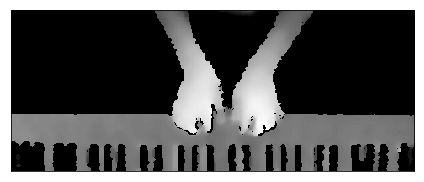

In [185]:
# plt.figure(figsize=(24,12))
# plt.subplot(221)
plt.imshow(dmap_rdf_disp, cmap="gray")
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
plt.tight_layout()
plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/rdf-dmap.jpg")

# plt.subplot(222)
# plt.imshow(mask_disp, cmap="gray")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# plt.tight_layout()
# plt.savefig("dmap-norm.pdf")

# plt.subplot(224)
# plt.imshow(mask_pred, cmap="gray")
# plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
# # # plt.tight_layout()

In [65]:
dcf_results = np.load("rdf_dcf_results.npz")

In [66]:
acc = dcf_results["accuracy"]
f_score = dcf_results["f_score"]

[ 0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275  0.3  ]


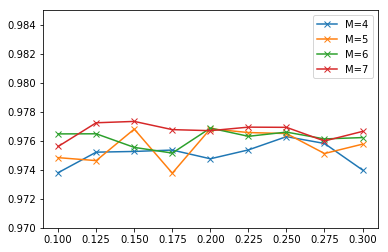

In [67]:
x_vals = np.linspace(.1, .3, 9)
print(x_vals)

axes = plt.gca()
axes.set_ylim([.97,.985])
axes.set_xticks(x_vals)
plt.plot(x_vals, acc, marker='x')
plt.legend(['M=4', 'M=5', 'M=6', 'M=7'])

## ROC Plots

In [61]:
x = np.array([])
y = np.array([3, 4, 5, 6, 8])
z = np.hstack((x,y))
y = np.array([3, 4, 5, 6, 8])
z = np.hstack((z,y))

In [62]:
z

array([ 3.,  4.,  5.,  6.,  8.,  3.,  4.,  5.,  6.,  8.])

In [63]:
radii = np.linspace(.1, .3, 9)

In [64]:
print(radii)

[ 0.1    0.125  0.15   0.175  0.2    0.225  0.25   0.275  0.3  ]


In [154]:
from skimage.transform import rotate
from sklearn.preprocessing import normalize
img = load_depthmap("data/posture/p1/p1e/000387.bin")
img = img.astype(float)
img[img!=0] = (img[img!=0] - np.min(np.abs(img[img!=0]))) / ( np.max(np.abs(img[img!=0])) - np.min(np.abs(img[img!=0])))
img = img[:, ::-1]


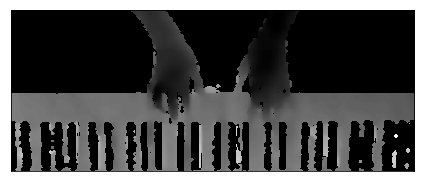

In [155]:
plt.imshow(img, cmap="gray")
plt.tick_params(axis="both", which="both", bottom="off", top="off", labelbottom="off", labelleft="off", left="off")
plt.tight_layout()
# plt.savefig("/Users/fortjay81/Dropbox/Uvic/dissertation/publications/1_WIP/CMJ_VPT_2017/figures/depth-map.jpg")

In [7]:
test = np.fromfile("data/posture/p4/p4e/000400.bin", 'uint16')
test2 = load_depthmap("data/posture/p4/p4e/000400.bin")

In [5]:
test = test.reshape((480, 640))
test = test[154:346, 80:560]

(array([ 188665.,       0.,     630.,    4814.,    1175.,   12470.,
          26365.,   58845.,    8363.,    5873.]),
 array([   0. ,   98.8,  197.6,  296.4,  395.2,  494. ,  592.8,  691.6,
         790.4,  889.2,  988. ]),
 <a list of 10 Patch objects>)

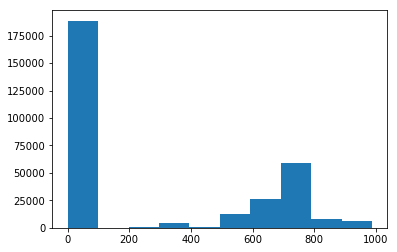

In [11]:
plt.hist(test)